In [48]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [49]:
print('x_train shape:', x_train.shape)

x_train shape: (50000, 32, 32, 3)


In [50]:
print('y_train shape:', y_train.shape)

y_train shape: (50000, 1)


In [51]:
import matplotlib.pyplot as plt

The label is: [6]


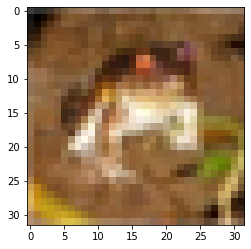

In [52]:
img = plt.imshow(x_train[0])
print('The label is:', y_train[0])

The label is: [9]


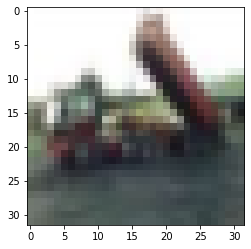

In [53]:
img = plt.imshow(x_train[2])
print('The label is:', y_train[2])

In [54]:
import tensorflow as tf

y_train_one_hot = tf.keras.utils.to_categorical(y_train, 10)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, 10)

In [55]:
print('The one hot label is:', y_train_one_hot)

The one hot label is: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [56]:
print('The one hot label is:', y_train_one_hot[0])

The one hot label is: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [57]:
print('The one hot label is:', y_train_one_hot[2])

The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [58]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

#Building and Training our Convolutional Neural Network

In [59]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()

##First Level Layers

###Conv Layer (Filter size 3x3, Depth 32)

In [60]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))

###Conv Layer (Filter size 3x3, Depth 32)

In [61]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

###Max Pool Layer (Filter size 2x2)

In [62]:
model.add(MaxPooling2D(pool_size=(2, 2)))

###Dropout Layer (Prob of dropout 0.25)

In [63]:
model.add(Dropout(0.25))

##Second Level Layers

###Conv Layer (Filter size 3x3, Depth 32)

In [64]:
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

###Conv Layer (Filter size 3x3, Depth 32)

In [65]:
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

###Max Pool Layer (Filter size 2x2)

In [66]:
model.add(MaxPooling2D(pool_size=(2, 2)))

###Dropout Layer (Prob of dropout 0.25)

In [67]:
model.add(Dropout(0.25))

##Flatten

In [68]:
model.add(Flatten())

##FC Layer (512 neurons)

In [69]:
model.add(Dense(512, activation='relu'))

##Dropout Layer (Prob of dropout 0.5)

In [70]:
model.add(Dropout(0.5))

##FC Layer, Softmax (10 neurons)

In [71]:
model.add(Dense(10, activation='softmax'))

##Model Summary

In [72]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

##Model Compilation

In [73]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

##Model Fitting

In [74]:
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=32, epochs=20, 
           validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 242s 193ms/step - loss: 1.5583 - accuracy: 0.4298 - val_loss: 1.1493 - val_accuracy: 0.5812
Epoch 2/20
1250/1250 [==============================] - 240s 192ms/step - loss: 1.1518 - accuracy: 0.5901 - val_loss: 0.9560 - val_accuracy: 0.6595
Epoch 3/20
1250/1250 [==============================] - 240s 192ms/step - loss: 0.9952 - accuracy: 0.6468 - val_loss: 0.8977 - val_accuracy: 0.6845
Epoch 4/20
1250/1250 [==============================] - 241s 193ms/step - loss: 0.8971 - accuracy: 0.6842 - val_loss: 0.8728 - val_accuracy: 0.6975
Epoch 5/20
1250/1250 [==============================] - 240s 192ms/step - loss: 0.8186 - accuracy: 0.7114 - val_loss: 0.8359 - val_accuracy: 0.7063
Epoch 6/20
1250/1250 [==============================] - 241s 193ms/step - loss: 0.7568 - accuracy: 0.7345 - val_loss: 0.7534 - val_accuracy: 0.7385
Epoch 7/20
1250/1250 [==============================] - 241s 193ms/step - loss: 0.7081 - accuracy: 0.7523 - val_

##Model Results Plotting

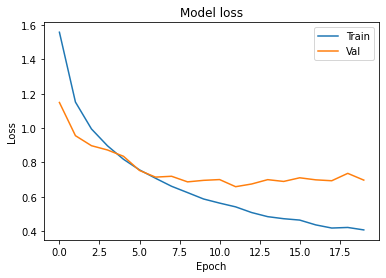

In [75]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

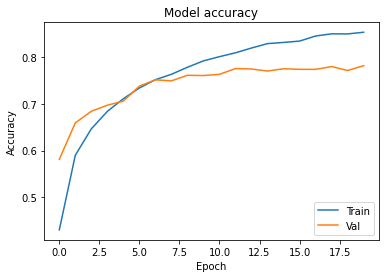

In [77]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

##Model Evaluation

In [78]:
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 14s 44ms/step - loss: 0.7272 - accuracy: 0.7746


0.7746000289916992

##Model Saving

In [79]:
model.save('my_cifar10_model.h5')

#Testing out with your own images

In [86]:
my_image = plt.imread("cat2.jpg")

In [87]:
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3))

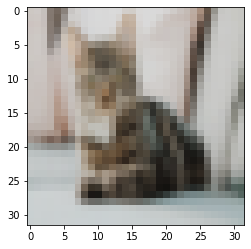

In [88]:
img = plt.imshow(my_image_resized)

In [89]:
import numpy as np
probabilities = model.predict(np.array( [my_image_resized,] ))

probabilities

array([[2.3483555e-05, 1.2185914e-06, 4.2512738e-06, 9.8385161e-01,
        3.0316047e-05, 1.0489488e-02, 9.6206291e-05, 9.9237586e-05,
        1.7876338e-05, 5.3863260e-03]], dtype=float32)

In [90]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities[0,index[5]])

Most likely class: cat -- Probability: 0.9838516
Second most likely class: dog -- Probability: 0.010489488
Third most likely class: truck -- Probability: 0.005386326
Fourth most likely class: horse -- Probability: 9.9237586e-05
Fifth most likely class: frog -- Probability: 9.620629e-05
